# Jupyter notebook

This is a jupyter notebook.  It is made up of cells which  display either text or run computer code.  You can alter the code and run it to see haw your input affects the output.

With this notebook the you can study the effect on radiographs of the changes in input.  The code that runs produces a prediction of how the x-ray spectra of an x-ray tube or the images that result alter with changes in exposure factors. 

To run the code in a cell you should click in the cell you wish to run and either press the "ctrl" and "enter" (runs the code and keeps the same cell as the current cell), or "shift" and "enter" (runs the code and makes the next cell active).

The cell that contains the command "run ./scripts/startup.py" should be run initially as it loads other functions that allow this notebook to function. Depending on the computer specification, that initial run may take up to a minute to complete.

The note book runs in a web-page. It has multiple menu options.

You should go through the content cell by cell, reading some cells, while in others running code while changing input.  You can add a blank cell, copy code from a previous cell while changing input parameters.  This will allow you to see the output from multiple different inputs.

At the end of this exercise you should understand how changes in exposure affect:

<ul>
<li>exposure factors affect the x-ray beam</li>
<li>exposure factors affect tissue contrast</li>
<li>random noise appears in radiographic images</li>
</ul>

# Exposure Settings in Radiography

An understanding the background to radiographic exposure settings gives insight into how image contrast and signal to noise ratio can be optimized, and why noise due to "quantum mottle" is present in the image.

Image contrast in radiographs refers to a difference in grey level between organs or tissues.  The basis of the imaging system is that a regions of interest, an organ  or a lesion of interest will contrast with, i.e. have a different shade of grey in the image, to surrounding tissue.  If there was no such difference the organ or lesion would not be visible.

In [8]:
run ./scripts/setup.py

Completed






Exposure settings in radiography are usually defined by three parameters. These are 
<ul>
<li>time (s)</li>
<li>tube current (in milli Ampers mA))</li>
<li>peak tube voltage (in kilovolts, (kVp))</li> 
</ul>

These parameters describe the electrical conditions for the x-ray tube when an exposure is made. The schematic diagram of an x-ray tube shows how these settings are applied. 


<img src="images/x-ray-tube-vector-illustration-radiology-scan-equipment-structural-scheme-healthcare-method-transparent-body-luggage-ct-168832490.jpg" alt="x- ray tube"  width="500" height="600"> 

A change in the mA setting for an exposure will change the current flowing through the fillament (labeled hot cathod filament in the diagram). Increases or decreases in the fillament temperature increase and decrease  filament current.  The higher the filament tempeature th egreater the size of the electron cloud at the cathode. This in turn increases the overall tube current (electrical currrent passing from cathode to anodede) when the exposure switch is closed.  Adjusting the kVp changes the electrical potential difference accoss the x-ray tube (i.e. between the cathode and anode). Changes in mAs only affect the number of photons in the x-ray beam (quantative effect).  Changes in kVp affect both the the number and energy  of the x-ray photons emitted from the x ray tube (quantative and qualtative effect).


The spectrum of x-ray photons emitted from an x-ray tube can be plotted to show beam intensity (number of photons) at various photon energies (in keV). The electron-volt (eV) is a unit of energy.

<img src="images/spectrum_100.png" alt="x- ray tube"  width="500" height="600"> 

The plot above models the spectrum emitted from an X-Ray tube operating at 100 kVp.  

Note:

<ul>
<li>many x-ray photon energies are present</li>
<li>there is a discrete maximum photon energy (upper threshold here is 100 keV)</li>
<li>there is a lower threshold (less well defined but about 15 keV)</li> 
    <li>the majority of photons present have energies between these extremes.</li>
</ul>

The photons present in the spectrum result from two discrete processes, the principal process is "breaking radiation" produced in the anode target (<i>Bremsstrahlung</i>).  This is responsible for the bulk of the photons described by the smooth part of the curve.  The other process is characteristic radiation which contributes to the focal peaks in the curve at very specific photon energies.  The photon energy of these peaks is completely determined by the composition of the anode material.  The location of the peaks are "characteristic" for the anode material present.  

The cell below contains a function "plot_spectra()". It takes one input.  Use it to generate spectra of x-ray beams produced at a range of kVp setting (40 to 120 kVp). To generate the spectrum for a <b>40</b> kVp exposure hive <b>40</b> as input to the function, i.e.  "plot_spectra(<b>40</b>)".  For an <b>80</b> kVp exposure run  "plot_spectra(<b>80</b>)".

As you plot these spectra note how the kVp setting affects:

<ul>
    <li>the area under the spectral curve</li>
    <li>the shape of the curve</li>
    <li>the maximum and minimum beam energy</li>
</ul>
     



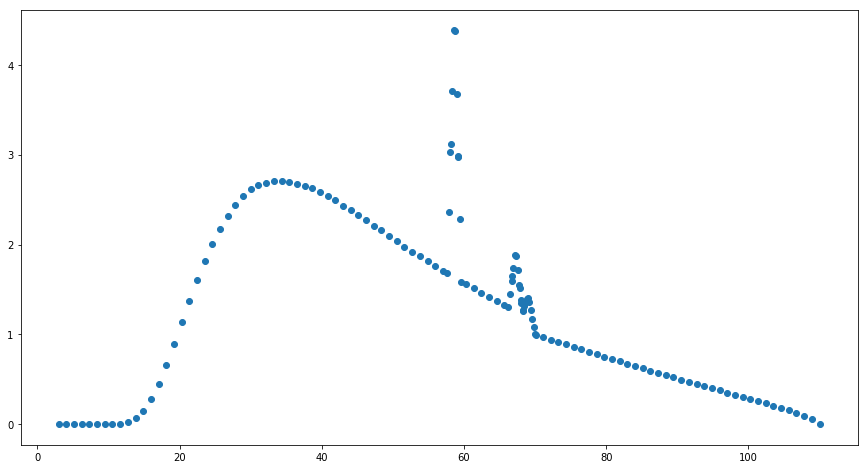

<Figure size 72000x72000 with 0 Axes>

In [9]:

plot_spectra(110)


## Interaction of the x-ray beam with tissues and organs

When a radiographic exposure is made, photons from the spectrum interact with the patient.  The organs and tissues within the patient stop, or attenuate these photons.  This property of tissue and organs to attenuate x-ray photons is described by a parameter called the linear attenuation coefficient $\mu$ for the tissue.  Each tissue has a different attenuation coefficient. If the difference between two tissues is sufficiently large, the tissues will contrast with each other, i.e. will appear as a difference shade of gray.

The plot below shows the linear attenuation coefficient for liver and adipose tissue.  

Note that:

<ul>
    <li>The values are different for the two tissues</li>
    <li>The magnitude of that difference decreases with increasing photon energy</li>
    <li>The values reduce for both tissues as the energy of the photon increases</li> 
</ul>


Thus $\mu$ is different for two issues, and the extent of that difference is a function of photon energy (keV)

<img src="images/tissue_mu.png" alt="x- ray tube"  width="500" height="600"> 



The cell below contains a function called "phantom" that simulates the attenuation of an x-ray beam in different tissues at different exposure factors.  It takes two inputs the first corresponds to a chosen mAs setting, the second to a chosen kVp setting.  Thus running the function "phantom(<b>2,65</b>)" will simulate the attenuation of an x-ray beam resulting from exposure settings of <b>2</b> mAs and <b>65</b> kVp.  The function outputs three images, one each for the predicted radiographic appearance of adipose tissue, of liver and of air. Note that in the function each tissue is uniform, each pixel will have a value for the linear attenuation coefficient appropriate for the tissue and the photon energy.

Run the code below to see the effects of different exposure settings.  The code will run faster (as less calculations are required) for lower values mAs and kVp.  For speed, choose mAs values between 1 and 3.  You can only choose kVp values in the range 40 to 120 kVp. High values of mAs and kVp will result in slow running code.

Keeping the mAs at values 1 or 2, and kVp in the range 40 to 90, will illustrate all the learning points of this exercise and allow acceptable code execution speed.  You can insert using the notebook menu and run the phantom function again so you can compare outputs.

Look at the ouput and note that :

<ul>
<li>the sequence from light to dark gray / black is, Liver, then Fat, then Air </li>
<li>gray levels in the different pixels that make up each square are not uniform -- there is some mottling</li>
<li>this mottling gets more severe at lower mAs and kVp  settings</li>
</ul>

The text outputs for the function are explained in the section below the next cell. 


3.3198838303475338
working on pixel row 10 out of 10 for image 1 of 3     
working on pixel row 10 out of 10 for image 2 of 3     
working on pixel row 10 out of 10 for image 3 of 3     

Liver; Mean pixel value, 0.2949799616054559
Liver; SNR,  0.8336542420772619 db
Total number of photons reaching detector  979

Fat; Mean pixel value, 0.4452555575092312
Fat; SNR,  1.181737646076703 db
Total number of photons reaching detector  1478

Air; Mean pixel value, 0.9986029539247595
Air; SNR,  3.7347248223089653 db
Total number of photons reaching detector  3315

Fat to liver contrast, 0.1788168341077547


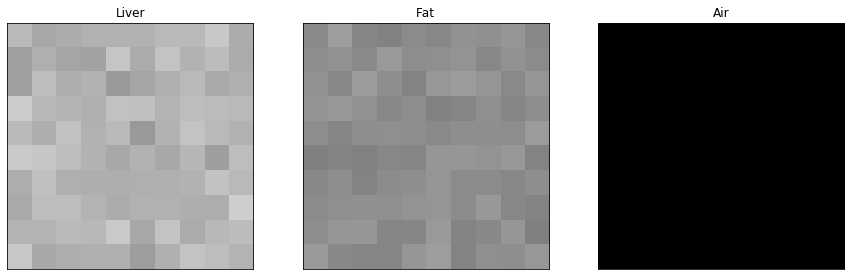

In [10]:
phantom(1,50)

## Image contrast and signal to noise ratio 

#### Meaning of the text outputs from the function:
    
<b>Mean pixel value:</b> There are 10 x 10 pixels in each of the three squares.  The mean pixel value is as suggested, the mean pixel value.  The greater the value, the darker the shade of gray. This is similar to most radiogarphic displays, the more photons that strike the detector, the darker the region is displayed.
        
<b>SNR:</b> This stands for signal to noise ratio. Signal gives information about the patient, noise is random variation that makes it harder to detect signal in the image.  Higher values of SNR are better than lower.</b>
            
<b>Fat to liver contrast:</b> This is a measure of the difference as it appears to the human eye between the gray tone of the liver and that of fat.  Higher contrast values between two tissues or between diseased and non-disease regions of tissue make those tissues easier to recognize and disease easier to detect.




By way of detail the parameters are calculated by the function:

$$Mean\ pixel\ value = \frac{1}{n}\sum_{i=1}^{n}{v_i} $$

<center>Where $v_i$ is the pixel value of the $i^{\text{th}}$ pixel, n = 100 for this phantom</center>

<br><br>



$$Signal\ to\ noise\ ratio = Log_{10}\ \frac{mean\ of\ tissue\ pixel\ values}{standard\ deviation\ of\ tissue\ pixel\ values}$$

<br><br>

$$Fat\ to\ liver\ contrast=Log_{10}\ \frac{mean\ fat\ pixel\ value}{mean\ liver\ pixel\ value} $$

<br><br>
<br style = “line-height:1;”> 

<center>oooooooooooooooooooo000oooooooooooooooooooo</center>

<meta charset="UTF-8">

### Acknowledgments

<p>The x-ray spectra used in this phantom were generated  using the python module "xpecgen"; it was set for a Tungston target, 22 mm added filtration and a 100 cm air gap. Details of xpecgen module are available at https://github.com/Dih5/xpecgen

<br><br>
The values used for the linear attenuation $\mu$ of fat, liver and air were derived from attenuation data published by Aysun B&ouml;ke, Linear attenuation of tissues from 1 keV to 150 keV, <i>Radiation Physics and Chemistry</i>, <b>102</b> pp 49-59, (2014).
</p>


